In [302]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [303]:
salt = pickle.load(open("salt.pickle","rb"))

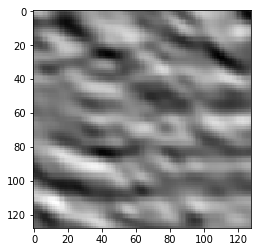

In [317]:
plt.imshow(salt[1][0], cmap = "gray")

In [305]:
x_train_real = np.reshape(salt[1][0], (1,128,128,1))

In [306]:
x_train_mask = np.reshape(salt[1][1], (1,128,128,1))

In [307]:
def convolve_image(img, kernel, strides = [1,1,1,1], pooling = [1,3,3,1],
                  padding='SAME'):
    tf.reset_default_graph()
    img = np.asarray(img, dtype='float32')/256
    img_shape = img.shape
    img_reshaped = img.reshape(1, img_shape[1], img_shape[2], 1)
    
    x  = tf.placeholder(tf.float32, [1,None,None, 1])
    w = tf.get_variable('w', initializer=tf.to_float(kernel))
    
    conv = tf.nn.conv2d(x, w,  strides=strides, padding=padding)
    relu = tf.nn.relu(conv)
    init = tf.global_variables_initializer()
    
    with tf.Session()  as sess:
        sess.run(init)
        relu = sess.run(relu, feed_dict={x: img_reshaped})
    return relu

In [308]:
kern = -1 * np.ones([3,3,1,1])

# \begin{bmatrix}
# -1 &  -1 & -1 \\
# -1 & \ \ 8 & -1 \\
# -1 &  -1 & -1
# \end{bmatrix}
kern[1,1,:,:] = 8
kern[0,0,:,:] = 0
kern[2,0,:,:] = 0
kern[0,2,:,:] = 0
kern[2,2,:,:] = 0
img_data = convolve_image(x_train_real, kern)
mask_data = convolve_image(x_train_mask, kern)

In [309]:
img = img_data.reshape(128,128)
mask = mask_data.reshape(128,128)

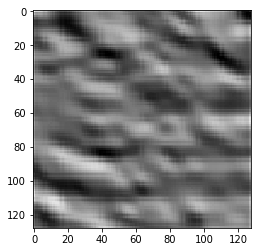

In [310]:
# img = np.delete(img, [img.shape[0] - 1], axis = 1)
# img = np.delete(img, [img.shape[1] - 1], 0)
plt.imshow(img, cmap = "gray")

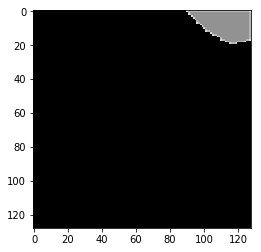

In [311]:
plt.imshow(mask, cmap = "gray")

# Now we convolve the two images into 'one' image to see the region where salt would be located

In [312]:
salt_image = (mask+img)/10

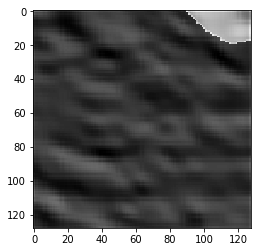

In [313]:
plt.imshow(salt_image/10, cmap = "gray")
#Image appears darker but 'mask' region is amplified

# Cool now we have an idea of how a mask and an image coincide together, now time to build the model

In [314]:
labels = x_train_mask/255